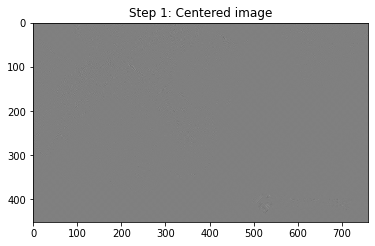

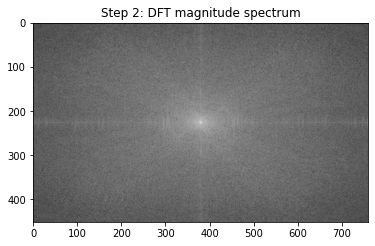

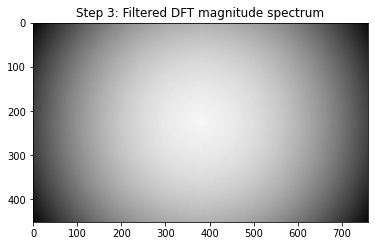

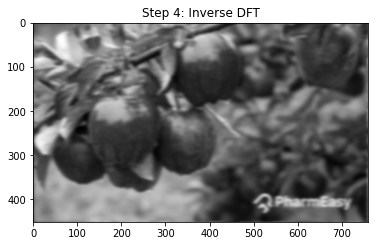

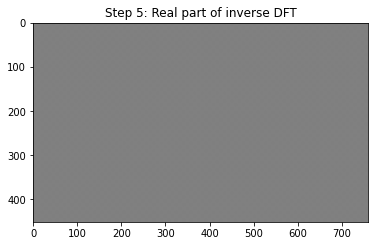

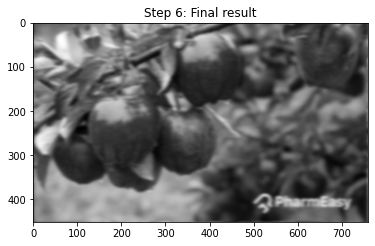

In [9]:
# Import the necessary libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO

image_url = "https://blog-images-1.pharmeasy.in/blog/production/wp-content/uploads/2022/05/03114105/7-5.jpg"
Image.open(BytesIO(requests.get(image_url).content)).save('example.jpg')


# Read the input image
img = cv2.imread('example.jpg', cv2.IMREAD_GRAYSCALE)

# Step 1: Multiply the input image by (-1)^(x+y) to center the transform
img_centered = img * np.power(-1, np.indices(img.shape).sum(axis=0))
plt.imshow(img_centered, cmap='gray')
plt.title('Step 1: Centered image')
plt.show()

# Step 2: Compute the DFT F(u, v) of the resulting image
F = np.fft.fft2(img_centered)
plt.imshow(np.log(np.abs(F)), cmap='gray')
plt.title('Step 2: DFT magnitude spectrum')
plt.show()

# Step 3: Multiply F(u,v) by a filter G(u, v)
# Assuming G is a low-pass filter with a cutoff frequency of 30
D0 = 30 # Cutoff frequency
u, v = np.indices(F.shape)
D = np.sqrt((u - F.shape[0] / 2) ** 2 + (v - F.shape[1] / 2) ** 2) # Distance from the center
G = np.exp(-D ** 2 / (2 * D0 ** 2)) # Gaussian low-pass filter
FG = F * G # Filtered DFT
plt.imshow(np.log(np.abs(FG)), cmap='gray')
plt.title('Step 3: Filtered DFT magnitude spectrum')
plt.show()

# Step 4: Compute the inverse DFT transform h*(x,y)
h_star = np.fft.ifft2(FG)
plt.imshow(np.abs(h_star), cmap='gray')
plt.title('Step 4: Inverse DFT')
plt.show()

# Step 5: Obtain the real part h(x,y) of 4
h = np.real(h_star)
plt.imshow(h, cmap='gray')
plt.title('Step 5: Real part of inverse DFT')
plt.show()

# Step 6: Multiply the result by (-1)^(x+y)
result = h * np.power(-1, np.indices(h.shape).sum(axis=0))
plt.imshow(result, cmap='gray')
plt.title('Step 6: Final result')
plt.show()
